In [1]:
import pandas as pd
import pylab as plt 
import seaborn as sns
import numpy as np
from math import sqrt
from matplotlib import pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
Temperature = pd.read_csv('Temperature.csv')
Temperature

,dt,City,Country,AverageTemperature,ANNO
0,1743-11-01,Århus,Denmark,6.068000,1743
1,1744-04-01,Århus,Denmark,5.788000,1744
2,1744-05-01,Århus,Denmark,10.644000,1744
3,1744-06-01,Århus,Denmark,14.051000,1744
4,1744-07-01,Århus,Denmark,16.082000,1744
...,...,...,...,...,...
8256236,2019-08-01,Cheyenne,US,21.555556,2019
8256237,2019-09-01,Cheyenne,US,22.888889,2019
8256238,2019-10-01,Cheyenne,US,7.055556,2019
8256239,2019-11-01,Cheyenne,US,-0.666667,2019


In [3]:
Temperature.dtypes

dt                     object
City                   object
Country                object
AverageTemperature    float64
ANNO                    int64
dtype: object

In [4]:
#dt column type transformation
Temperature['dt']= pd.to_datetime(Temperature['dt'])

In [5]:
#selection of Milan data only
TempMi = Temperature.loc[(Temperature['City'] == 'Milan')]
TempMi.reset_index(inplace=True, drop=True)
TempMi

,dt,City,Country,AverageTemperature,ANNO
0,1743-11-01,Milan,Italy,3.310000,1743
1,1744-04-01,Milan,Italy,7.226000,1744
2,1744-05-01,Milan,Italy,9.394000,1744
3,1744-06-01,Milan,Italy,13.216000,1744
4,1744-07-01,Milan,Italy,15.366000,1744
...,...,...,...,...,...
3233,2019-08-01,Milan,Italy,25.777778,2019
3234,2019-09-01,Milan,Italy,24.500000,2019
3235,2019-10-01,Milan,Italy,18.944444,2019
3236,2019-11-01,Milan,Italy,11.555556,2019


In [6]:
#Preparation to display the time series
TempMi1= TempMi[['dt','AverageTemperature']]
TempMi1.set_index('dt', inplace = True)
TempMi1

,AverageTemperature
dt,
1743-11-01,3.310000
1744-04-01,7.226000
1744-05-01,9.394000
1744-06-01,13.216000
1744-07-01,15.366000
...,...
2019-08-01,25.777778
2019-09-01,24.500000
2019-10-01,18.944444


<AxesSubplot:xlabel='dt'>

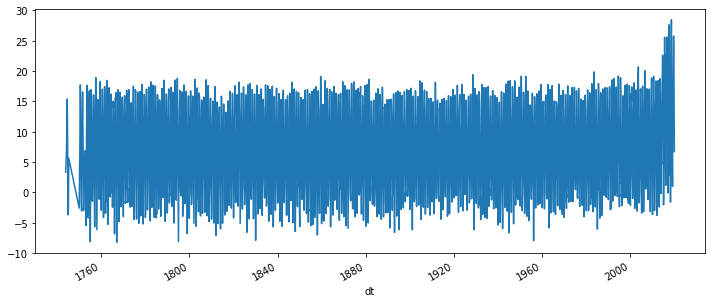

In [7]:
TempMi1['AverageTemperature'].plot(figsize=(12,5))

In [8]:
#selection only a few years
interval_year = (TempMi['ANNO'] > 1989) & (TempMi['ANNO'] <2020)
TempMi2 = TempMi.loc[interval_year]
TempMi2

,dt,City,Country,AverageTemperature,ANNO
2882,1990-01-01,Milan,Italy,-1.209000,1990
2883,1990-02-01,Milan,Italy,3.072000,1990
2884,1990-03-01,Milan,Italy,5.432000,1990
2885,1990-04-01,Milan,Italy,5.399000,1990
2886,1990-05-01,Milan,Italy,12.617000,1990
...,...,...,...,...,...
3233,2019-08-01,Milan,Italy,25.777778,2019
3234,2019-09-01,Milan,Italy,24.500000,2019
3235,2019-10-01,Milan,Italy,18.944444,2019
3236,2019-11-01,Milan,Italy,11.555556,2019


In [9]:
#Preparation to display the time series
TempMi2= TempMi2[['dt','AverageTemperature']]
TempMi2.set_index('dt', inplace = True)
TempMi2

,AverageTemperature
dt,
1990-01-01,-1.209000
1990-02-01,3.072000
1990-03-01,5.432000
1990-04-01,5.399000
1990-05-01,12.617000
...,...
2019-08-01,25.777778
2019-09-01,24.500000
2019-10-01,18.944444


<AxesSubplot:xlabel='dt'>

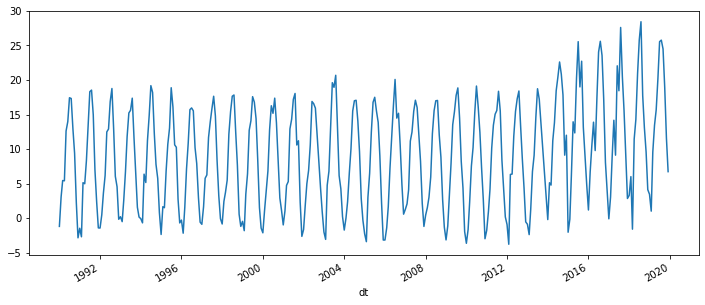

In [10]:
TempMi2['AverageTemperature'].plot(figsize=(12,5))

In [11]:
################################################################################################################################

In [12]:
# The p_value is returned to verify Stationarity
def p_value(df_value):
    result = adfuller(df_value.dropna())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [13]:
# Correlation and Differencing Plots (1 e 2).
def Differencing_Plot(df_value):  
    
    fig, axes = plt.subplots(3, 2, figsize=(8, 8))
    axes[0, 0].plot(df_value)
    axes[0, 0].set_title('Original Series')
    plot_acf(df_value, ax=axes[0, 1])

    axes[1, 0].plot(df_value.diff())
    axes[1, 0].set_title('1st Order Differencing')
    plot_acf(df_value.diff().dropna(), ax=axes[1, 1])

    axes[2, 0].plot(df_value.diff().diff())
    axes[2, 0].set_title('2nd Order Differencing')
    plot_acf(df_value.diff().diff().dropna(), ax=axes[2, 1])

    fig.tight_layout()
    return plt.show()

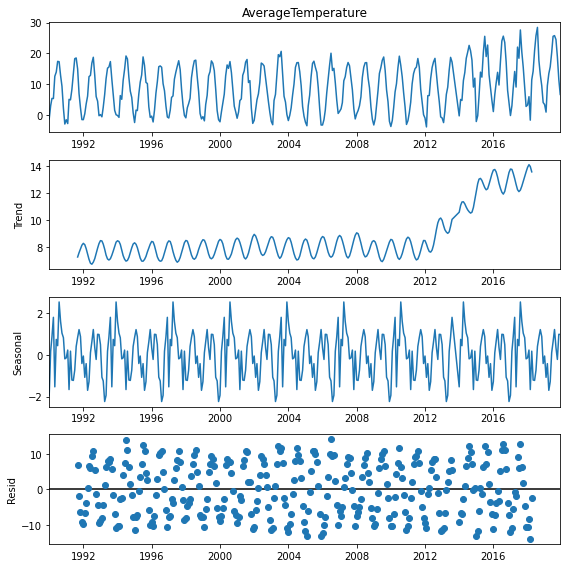

In [14]:
# Seasonal Variation Analyzing
plt.rcParams.update({'figure.figsize': (8,8)})
result_add = seasonal_decompose(TempMi2['AverageTemperature'], model = 'additive', period = 40)
decomposition_result = result_add.plot()

In [15]:
# ADF calculation
p_value(TempMi2['AverageTemperature'])

ADF Statistic: -0.485543
p-value: 0.894807


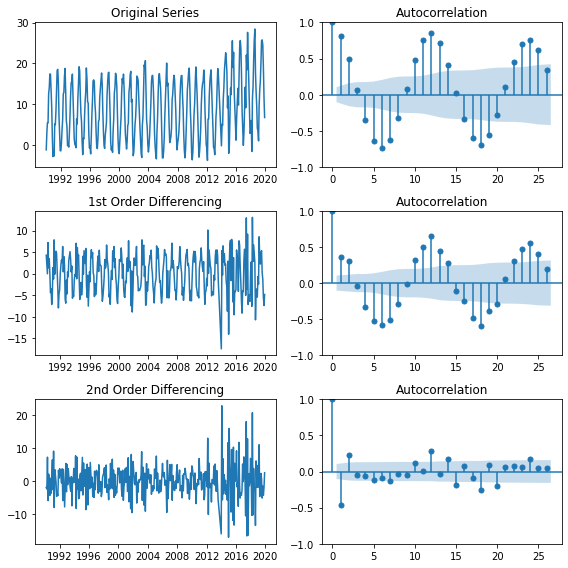

In [16]:
# Differencing plots representation
Differencing_Plot(TempMi2['AverageTemperature'])

In [17]:
p_value(TempMi2['AverageTemperature'].diff())

ADF Statistic: -7.327807
p-value: 0.000000


In [ ]:
#train, test = Dynamic_Splitting(Assumptions_Milano,"SETTOREECONOMICO",0.75)